## WALMART DATASET 

WE are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this project is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

Dataset is taken from https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## UPLOADING THE DATA TO GOOGLE DRIVE

In [2]:
from google.colab import files
uploaded=files.upload()

Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


## LOADING THE DATA 

In [4]:
import io
test=pd.read_csv(io.BytesIO(uploaded["test.csv"]))
train=pd.read_csv(io.BytesIO(uploaded["train.csv"]))
store=pd.read_csv(io.BytesIO(uploaded["stores.csv"]))

In [5]:
features=pd.read_csv(io.BytesIO(uploaded["features.csv"]))

## EDA

View the first few rows of the data set

In [6]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Size of the data set

In [10]:
train.shape

(421570, 5)

In [11]:
test.shape

(115064, 4)

In [12]:
store.shape

(45, 3)

In [13]:
features.shape

(8190, 12)

In [14]:
store.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

Merge the feature and train dataset

In [15]:
data=pd.merge(train,features,on=['Store','Date','IsHoliday'],how='inner')

In [16]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


Merge the data and stores dataset

In [17]:
df=pd.merge(data,store,on='Store',how='inner')
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


check for null values

In [18]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Remove the null values

In [19]:
from sklearn.impute import SimpleImputer

markdown=pd.DataFrame(SimpleImputer().fit_transform(df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
df=pd.concat([df,markdown],axis=1)

In [20]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
dtype: object

 converted it to datetime type and extracting day,month,year from it separetely

In [21]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
del df['Date']

## LABEL ENCODING

In [22]:
from sklearn.preprocessing import LabelEncoder

df['Type']=LabelEncoder().fit_transform(df['Type'])
df['IsHoliday']=LabelEncoder().fit_transform(df['IsHoliday'])
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int64
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
year              int64
month             int64
day               int64
dtype: object

## PLOTTING SOME PLOTS

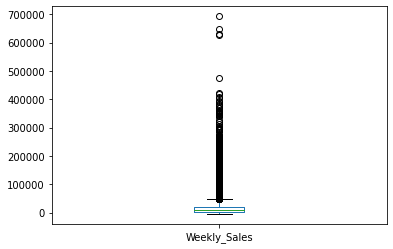

In [23]:
df['Weekly_Sales'].plot.box()

In [24]:
df.columns


Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'year', 'month',
       'day'],
      dtype='object')

Check for outliers

Store              AxesSubplot(0.125,0.657941;0.133621x0.222059)
Dept            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Weekly_Sales     AxesSubplot(0.44569,0.657941;0.133621x0.222059)
IsHoliday       AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Temperature     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Fuel_Price         AxesSubplot(0.125,0.391471;0.133621x0.222059)
CPI             AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Unemployment     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Type            AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Size            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

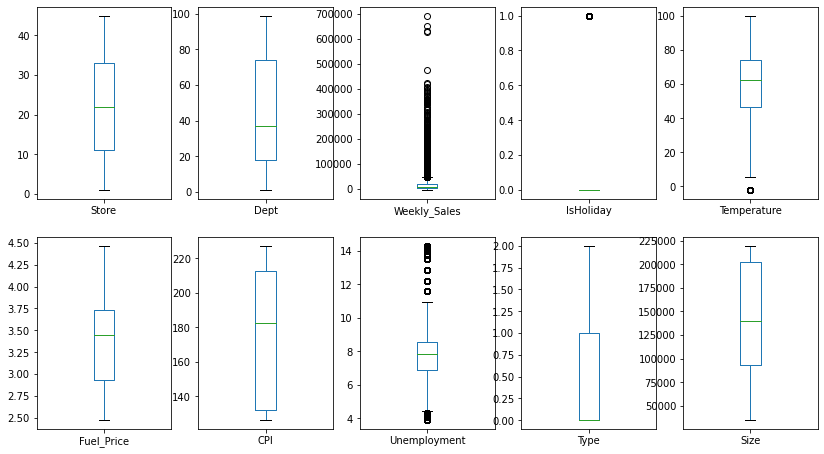

In [25]:
df[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']].plot(kind='box',subplots=1,layout=(3,5),figsize=(14,12))

## MODEL

We r going to define the Linear regression,Decision Tree Regressor,Random Forest Regressor

In [26]:
from scipy.stats import zscore 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
X = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']
X_scaled = X.apply(zscore)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=34)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

lr = LinearRegression()
dt= DecisionTreeRegressor()
rf = RandomForestRegressor()
models = [lr,dt,rf]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(r2_score(y_test,y_pred))

0.08508385525415985
0.9488920473579339
0.9710499769244533


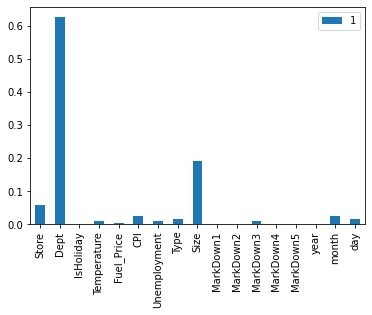

In [29]:
(pd.DataFrame([X.columns,rf.feature_importances_],columns=['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'year', 'month', 'day']).T).plot.bar()

In [30]:
pd.DataFrame([X.columns,rf.feature_importances_],columns=['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'year', 'month', 'day']).T

,0,1
Store,Store,0.0573091
Dept,Dept,0.625046
IsHoliday,IsHoliday,0.00233144
Temperature,Temperature,0.0102923
Fuel_Price,Fuel_Price,0.00494
CPI,CPI,0.0256326
Unemployment,Unemployment,0.0104004
Type,Type,0.0145006
Size,Size,0.192529
MarkDown1,MarkDown1,0.00156331


In [31]:
x1 = X_scaled.drop(['IsHoliday','year','MarkDown5','MarkDown4','MarkDown1','MarkDown2'],axis=1)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x1,y,test_size=.3,random_state=34)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.9712437295812172